Importing Shi Shi no cap

In [15]:
import warnings
from typing import Any, Dict, Optional, Tuple, Union
import matplotlib.pyplot as plt
import matplotlib.ticker as mpl_ticker
import numpy as np
import pandas as pd
import scipy as sp
import quantstats_lumi as qs
import databento as db

## PRICES OF JKHY AND PCG BY MINUTE

In [18]:
prices = pd.read_csv('data/stock/equity_table_singleday.csv')
# Extract the industrial classification, sector, and company names

prices['ts_event'] = pd.to_datetime(prices['ts_event'])

# Step 3: Set the ts_event column as the index
prices.set_index('ts_event', inplace=True)

prices.dropna(how='all', axis=1, inplace=True)
prices.dropna(subset=['JKHY'], inplace=True)


FIRST_MONTH_PATH = "./data/stock/xnas-itch-20230501-20230531.ohlcv-1m.dbn.zst"

# Read saved .dbn.zst
stored_data = db.DBNStore.from_file(FIRST_MONTH_PATH)

# Convert to dataframe
df = stored_data.to_df()
# df

train_prices = df.pivot_table(index='ts_event', columns='symbol', values='close', aggfunc='first')

tp_interp = train_prices.interpolate(method='time')

plt.figure(figsize=(10, 5))
plt.plot(prices.index, prices['JKHY'], marker='o', linestyle='-')
plt.plot(prices.index, prices['PCG'], marker='o', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('A')
plt.grid(True)
plt.show()


KeyError: "None of ['Date'] are in the columns"

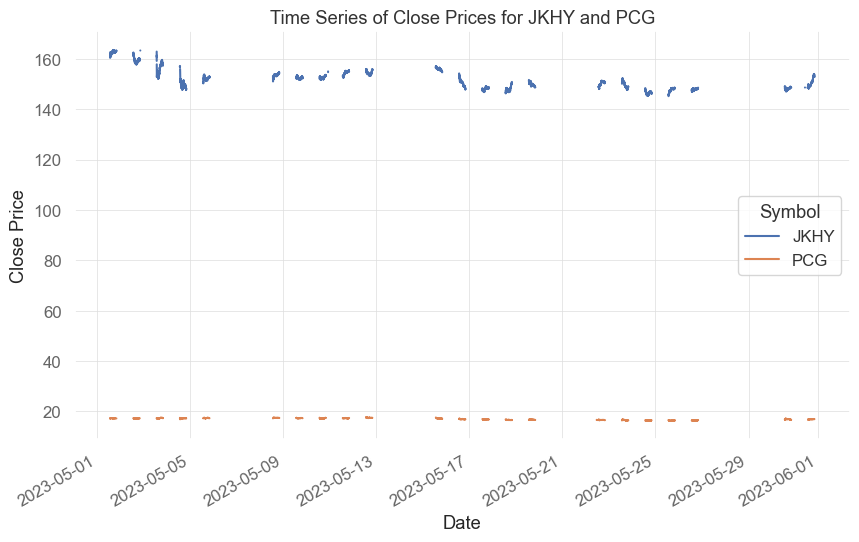

In [17]:
selected_symbols = tp_interp[['JKHY', 'PCG']]

# Plot the time series for the selected symbols
selected_symbols.plot(figsize=(10, 6))
plt.title('Time Series of Close Prices for JKHY and PCG')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend(title='Symbol')
plt.show()